In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

Using TensorFlow backend.


'3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]'

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Example
len(X_test)

10000

# CNN

In [4]:
X_train.shape 

(60000, 28, 28)

In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


create the  model

In [28]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Compile and train our model

In [49]:
#train the model
#sigmoid = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
sigmoid.history['loss']

[0.5911937991852562, 0.10451908478538195, 0.07817476152765254]

Now evaluate on test set

In [50]:
d = {'accuracy': [0.9864,0.9852,0.9716,0.9761],
     'loss':[0.043,0.045,0.302,0.078] ,
     'seconds/epoch' :[82, 99, 86, 88], 
     'type':['2 layers + relu','3 layers + relu',' 2 layers + tanh','2 layers + sigmoid']  }

df = pd.DataFrame(data=d)
df

,accuracy,loss,seconds/epoch,type
0,0.9864,0.043,82,2 layers + relu
1,0.9852,0.045,99,3 layers + relu
2,0.9716,0.302,86,2 layers + tanh
3,0.9761,0.078,88,2 layers + sigmoid


In [56]:
#print(CNN3.history['acc']) #99s 2ms/step 3 layers + relu 
#print(CNN2.history['acc']) # 82s 1ms/step 2 layers + relu
#tanh # 86s 1ms/step 2 layers + tanh
#sigmoid # 88s 1ms/step 2 layers + sigmoid
#history2 # 3 layers

import plotly.plotly as py
import plotly.tools as tool
import plotly.graph_objs as go
import pandas as pd 
tool.set_credentials_file(username='paulpeters52', api_key= 'eqPlm0Cs3ruRCJAAVnQl')

data = [
    go.Parcoords(
        line = dict(color = [1, 2 ,3, 4],
                   colorscale = [[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'#F3F10F'], [1,'#45f442']]),
        dimensions = list([
            dict(range = [0.9, 1],
                label = 'Accuracy', values = df['accuracy']),
            dict(range = [0.31, 0.04],
                label = 'Loss', values = df['loss']),
            dict(range = [100, 80],
                label = 'Seconds/epoch', values = df['seconds/epoch']),
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#ffffff',
    paper_bgcolor = '#ffffff'
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~paulpeters52/0 or inside your plot.ly account where it is named 'parcoords-basic'


# RNN

In [63]:
import tensorflow as tf
from keras.layers import Dropout, LSTM
from keras import optimizers

Setting up the training and network parameters

In [73]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

x_train = X_train/255.0
x_test = X_test/255.0

In [105]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [106]:
opt = optimizers.SGD(lr=0.005, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 35s 586us/step - loss: 1.3397 - acc: 0.6525 - val_loss: 0.5042 - val_acc: 0.8524
Epoch 2/3
60000/60000 [==============================] - 32s 535us/step - loss: 0.4492 - acc: 0.8702 - val_loss: 0.3701 - val_acc: 0.8918
Epoch 3/3
60000/60000 [==============================] - 32s 540us/step - loss: 0.3302 - acc: 0.9019 - val_loss: 0.2609 - val_acc: 0.9216


In [110]:
d = {'type': ['2 layers','1 layer w flatten', '1 l + SGD'], 'acc': [0.97,0.98,0.90 ], 'loss': [0.08, 0.05,0.33  ], 
    'time':[65,35, 32 ]}
df = pd.DataFrame(data=d)

In [111]:
data = [
    go.Parcoords(
        line = dict(color = [1, 2 ,3],
                   colorscale = [[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'#F3F10F']]),
        dimensions = list([
            dict(range = [0.9, 1],
                label = 'Accuracy', values = df['acc']),
            dict(range = [0.35, 0.04],
                label = 'Loss', values = df['loss']),
            dict(range = [68, 30],
                label = 'Seconds/epoch', values = df['time']),
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#ffffff',
    paper_bgcolor = '#ffffff'
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-RNN')



# Auto-Encoders

In [112]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [44]:
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)

autoencoder=Model(input_img, decoded)


autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [45]:
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [46]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

Ae = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3651 - acc: 0.7518 - val_loss: 0.2725 - val_acc: 0.7941
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2655 - acc: 0.7976 - val_loss: 0.2554 - val_acc: 0.7986
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2447 - acc: 0.7981 - val_loss: 0.2321 - val_acc: 0.7977
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2234 - acc: 0.7977 - val_loss: 0.2129 - val_acc: 0.7975
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2073 - acc: 0.7985 - val_loss: 0.1994 - val_acc: 0.7986
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1957 - acc: 0.7997 - val_loss: 0.1896 - val_acc: 0.8001
Epoch 7/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1870 - acc: 0.8009 - val_loss: 0.1818 - val_acc

In [48]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

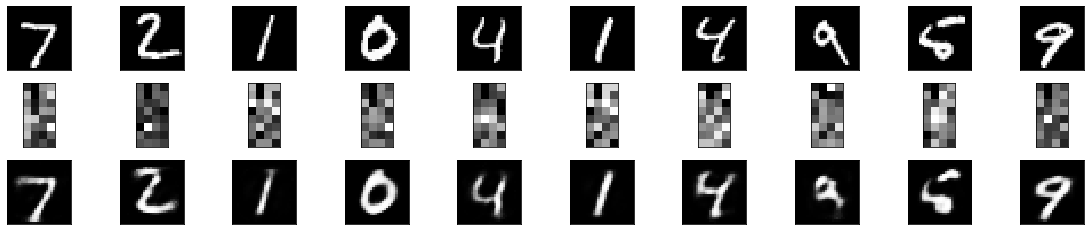

In [52]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.savefig("ae.jpg")
plt.show()

In [51]:
plt.savefig("ae.jpg")

<Figure size 432x288 with 0 Axes>